In [1]:
import pandas as pd
import numpy as np
import sys, typing
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from __future__ import division, print_function
import numpy as np
from math import erf

'''Returns the probability density function of the normal distribution with
mean mu and standard deviation sigma.'''
def gaussian(mu, sigma):
    return lambda x: np.exp(-x**2/(2*sigma**2)) / ((2*np.pi)**0.5 * sigma)

'''The following functions compute advantage of the membership adversary if
the test standard error is sd times the training standard error.'''
def theo_adv(sd): #known test error
    temp = sd * np.sqrt(np.log(sd) / (sd**2 - 1))
    return erf(temp) - erf(temp / sd)

def theo_adv2(sd): #unknown test error
    return erf(0.5**0.5) - erf(0.5**0.5 / sd)

In [3]:
ratio = np.linspace(1.0, 8.0, num=35)
theo_advs = [theo_adv(x) for x in ratio]
theo_adv2s = [theo_adv2(x) for x in ratio]

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [4]:
eye_known_linreg = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/linreg-summary.csv')
eye_unknown_linreg = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/linreg-summary.csv')

eye_known_tree = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/tree-summary.csv')
eye_unknown_tree = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/tree-summary.csv')

eye_known_lasso = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/lasso-summary.csv')
eye_unknown_lasso = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/lasso-summary.csv')

eye_known_svm = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/svm-summary.csv')
eye_unknown_svm = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/svm-summary.csv')

eye_known_sgdreg = pd.read_csv('results-sklearn/eyedata/membership/known-test-error/sgdreg-summary.csv')
eye_unknown_sgdreg = pd.read_csv('results-sklearn/eyedata/membership/unknown-test-error/sgdreg-summary.csv')

iwpc_known_tree = pd.read_csv('results-sklearn/iwpc/membership/known-test-error/tree-summary.csv')
iwpc_unknown_tree = pd.read_csv('results-sklearn/iwpc/membership/unknown-test-error/tree-summary.csv')

iwpc_known_lasso = pd.read_csv('results-sklearn/iwpc/membership/known-test-error/lasso-summary.csv')
iwpc_unknown_lasso = pd.read_csv('results-sklearn/iwpc/membership/unknown-test-error/lasso-summary.csv')

iwpc_known_svm = pd.read_csv('results-sklearn/iwpc/membership/known-test-error/svm-summary.csv')
iwpc_unknown_svm = pd.read_csv('results-sklearn/iwpc/membership/unknown-test-error/svm-summary.csv')

iwpc_known_sgdreg = pd.read_csv('results-sklearn/iwpc/membership/known-test-error/sgdreg-summary.csv')
iwpc_unknown_sgereg = pd.read_csv('results-sklearn/iwpc/membership/unknown-test-error/sgdreg-summary.csv')


In [5]:
def add_overfit(df):
    df['Rcv/Remp'] = df['r_cv']/df['r_emp']
    return df


In [7]:
models = [eye_known_linreg, eye_unknown_linreg, eye_known_tree, eye_unknown_tree, 
         eye_known_lasso, eye_unknown_lasso, eye_known_svm, eye_unknown_svm,
         eye_known_sgdreg, eye_unknown_sgdreg, iwpc_known_tree, iwpc_unknown_tree,
        iwpc_known_lasso,iwpc_unknown_lasso, iwpc_known_svm, iwpc_unknown_svm, 
         iwpc_known_sgdreg, iwpc_unknown_sgereg]

for m in models:
    m = add_overfit(m)

In [8]:
iwpc_known_sgdreg

,param,r_emp,r_cv,train_TRAIN,test_TRAIN,Rcv/Remp
0,0.0001,0.7212,0.7231,0.7321,0.7291,1.002634
1,0.0010,0.7207,0.7234,0.7320,0.7293,1.003746
2,0.0100,0.7237,0.7258,0.7321,0.7292,1.002902
3,0.1000,0.7435,0.7445,0.7311,0.7288,1.001345
4,1.0000,0.8430,0.8377,0.2852,0.2873,0.993713
5,10.0000,0.9582,0.9594,0.7087,0.7064,1.001252
6,100.0000,0.9954,0.9953,0.2873,0.2891,0.999900


In [31]:
eye_known = [eye_known_linreg, eye_known_tree, 
         eye_known_lasso,  eye_known_svm, 
         eye_known_sgdreg]
         
iwpc_known = [iwpc_known_tree, 
        iwpc_known_lasso, iwpc_known_svm, 
         iwpc_known_sgdreg]

eye_unknown = [eye_unknown_linreg, eye_unknown_tree, 
          eye_unknown_lasso,  eye_unknown_svm,
         eye_unknown_sgdreg] 

iwpc_unknown = [iwpc_unknown_tree,
       iwpc_unknown_lasso,iwpc_unknown_svm, 
         iwpc_unknown_sgereg]

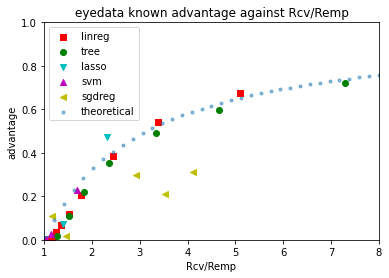

In [36]:
markers = [ "," , "o" , "v" , "^" , "<", ">"]
colors = ['r','g','c','m', 'y', 'k']
label = ['linreg', 'tree', 'lasso', 'svm', 'sgdreg']
ax = plt.gca()
for i in range(len(eye_known)):
    df = known[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['train_TRAIN']-df['test_TRAIN'], label=label[i] , marker=mi, color=ci) 
plt.scatter(ratio, theo_advs, alpha = 0.5,marker= '.', label ='theoretical')
plt.legend()
plt.xticks()
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 8])
plt.title('eyedata known advantage against Rcv/Remp')
plt.show() 

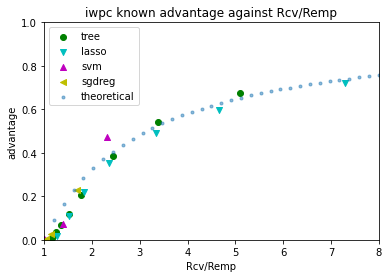

In [39]:
markers = [ "o" , "v" , "^" , "<", ">"]
colors = ['g','c','m', 'y', 'k']
label = [ 'tree', 'lasso', 'svm', 'sgdreg']
ax = plt.gca()
for i in range(len(iwpc_known)):
    df = known[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['train_TRAIN']-df['test_TRAIN'], label=label[i] , marker=mi, color=ci) 
plt.scatter(ratio, theo_advs, alpha = 0.5,marker= '.', label ='theoretical')
plt.legend()
plt.xticks()
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 8])
plt.title('iwpc known advantage against Rcv/Remp')
plt.show() 

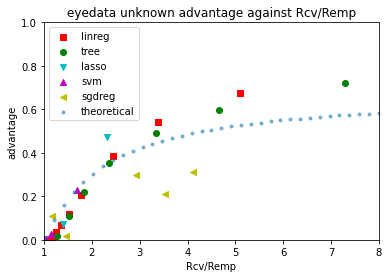

In [41]:
markers = [ "," , "o" , "v" , "^" , "<", ">"]
colors = ['r','g','c','m', 'y', 'k']
label = ['linreg', 'tree', 'lasso', 'svm', 'sgdreg']
ax = plt.gca()
for i in range(len(eye_unknown)):
    df = known[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['train_TRAIN']-df['test_TRAIN'], label=label[i] , marker=mi, color=ci) 
plt.scatter(ratio, theo_adv2s, alpha = 0.5,marker= '.', label ='theoretical')
plt.legend()
plt.xticks()
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 8])
plt.title('eyedata unknown advantage against Rcv/Remp')
plt.show() 

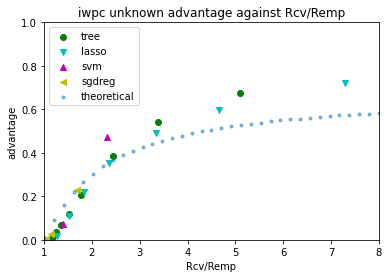

In [42]:
markers = [ "o" , "v" , "^" , "<", ">"]
colors = ['g','c','m', 'y', 'k']
label = [ 'tree', 'lasso', 'svm', 'sgdreg']
ax = plt.gca()
for i in range(len(iwpc_unknown)):
    df = known[i]
    mi = markers[i] #marker for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(df['Rcv/Remp'], df['train_TRAIN']-df['test_TRAIN'], label=label[i] , marker=mi, color=ci) 
plt.scatter(ratio, theo_adv2s, alpha = 0.5,marker= '.', label ='theoretical')
plt.legend()
plt.xticks()
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 8])
plt.title('iwpc unknown advantage against Rcv/Remp')
plt.show() 

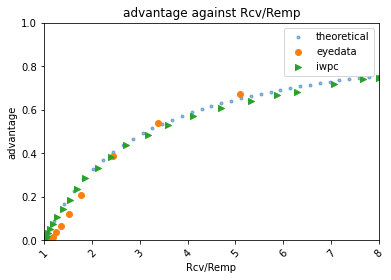

In [54]:
ax = plt.gca()
plt.scatter(ratio, theo_advs, alpha = 0.5,marker= '.', label ='theoretical')
plt.scatter(eye_known_testerror['Rcv/Remp'], eye_known_testerror['train_TRAIN']-eye_known_testerror['test_TRAIN'], label= 'eyedata')
plt.scatter(iwpc_known_testerror['Rcv/Remp'], iwpc_known_testerror['train_TRAIN']-iwpc_known_testerror['test_TRAIN'],marker = '>', label= 'iwpc')
plt.xticks(rotation=45)
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 8])
plt.title('advantage against Rcv/Remp')
plt.legend()

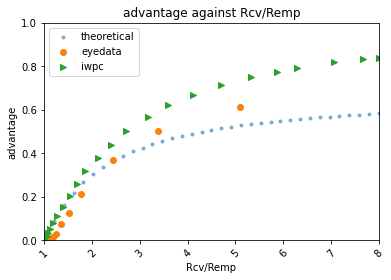

In [55]:
ax = plt.gca()
plt.scatter(ratio, theo_adv2s, alpha = 0.5, marker= '.', label ='theoretical')
plt.scatter(eye_unknown_testerror['Rcv/Remp'], eye_unknown_testerror['train_TRAIN']-eye_unknown_testerror['test_TRAIN'], label= 'eyedata')
plt.scatter(iwpc_unknown_testerror['Rcv/Remp'], iwpc_unknown_testerror['train_TRAIN']-iwpc_unknown_testerror['test_TRAIN'],marker = '>', label= 'iwpc')
plt.xticks(rotation=45)
plt.ylabel('advantage')
plt.xlabel('Rcv/Remp')
plt.ylim([0, 1])
plt.xlim([1, 8])
plt.title('advantage against Rcv/Remp')
plt.legend()